# **Revisão!**

<font size=5>Até o momento nos consentramos nas análises morfológica (classe gramatical) e sintática (estrutura das frases) dos textos com o objetivo de entender a construção das frases e o papel de cada palavra nas sentenças.</font>


## Exemplos de análises morfológicas e sintáticas

In [ ]:
#!pip install spacy
!python -m spacy download pt_core_news_sm
#pode ser necessário reinicar o runtime

In [ ]:
import spacy
pt = spacy.load('pt_core_news_sm')

In [ ]:
# outra forma de importar o pacote com o modelo em português
#import pt_core_news_sm
#pt = pt_core_news_sm.load()

In [4]:
from spacy import displacy

doc = pt('O gato perseguiu o rato')

displacy.render(doc, style='dep', jupyter=True, options={'distance':100})

In [6]:
import spacy
from spacy import displacy

nlp = spacy.load('pt_core_news_sm')

doc2 = nlp(u'Suas primeiras relaçãoes amorosas foram frustates')

displacy.render(doc2, style='dep', jupyter=True, options={'distance': 90})

In [7]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:30} {spacy.explain(token.pos_)}')

O          DET      <artd>|ART|M|S|@>N             determiner
gato       NOUN     <np-def>|N|M|S|@SUBJ>          noun
perseguiu  VERB     <mv>|V|PS|3S|IND|@FS-STA       verb
o          DET      <artd>|ART|M|S|@>N             determiner
rato       NOUN     <np-def>|N|M|S|@<ACC           noun


## Part-of-speech Tags "Super Categorias"

<font size=5>Abaixo esta uma tabela com as principais POS Tags mas, para pesquisar e entender mais sobre cada tag, uma boa forte é o site https://universaldependencies.org/treebanks/pt_gsd/index.html
</font> 
<br>

---

<br>
<table><tr><th>POS</th><th>DESCRIÇÃO</th><th>EXEMPLOS</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>
</table>


# Classificação

<font size=5>
Unindo esse conhecimento, técnicas de extração de features como vetorizadores (CounterVec e TF-IDF) e técnicas de machine learning somos capazes de classificar textos, como no exercício de classificar categorias de produtos!
<br><br>
 
Muito se fala sobre análise de sentimentos mas, a priori, não existe muita diferença\* entre o exercício de classificação de produtos e a classificação de textos entre sentimentos positivos e negativos.
<br><br>
  
\* A principal diferença a se destacar seria o uso de ironias, sarcasmo e figuras de linguagem quando trabalhamos com análise de sentimentos.
<br><br>  

</font>


##**Exercício 1**

1.   Com base no dataset disponibilizado para download, carrege 10 mil linhas de forma randômica.<br/>
    - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv
2.   Crie um classificador que consiga predizer o sentimeto associado a um texto novo (não pertencente a amostra)<br/>


In [ ]:
import pandas as pd

df = pd.read_csv(
    'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv'
)

In [9]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


<br>

#**Análise Semântica em NLP**

---

<br>
<font size=5>
O próximo passo é realizar uma análise semântica dos dados, onde buscaremos entender o significado de cada palavra e como a mesma interage no texto!
</font>
</br>
</br>
 
---

### Essa análise tem a ideia de aprofundar o estudo computacional da análise morfológica e sintática que é a forma mais comum de tratar estudos em NLP e também extrair o significado dos texto em seu contexto.
<br/>

### Existem algumas formas de desenvolver esses estudos, uma delas é montar uma **Matriz de Co-Ocorrência (Co-Occurrence Matrix)** com o processo de one-hot-encoded (conhecido também como one-hot-vectors), porém esse processo não é considerado muito eficaz em obter significado semântico, mas muito utilizado em modelos de classificação, análise de sentimento e utilização de bag-of-words. Veja abaixo a representação dessa matrix:

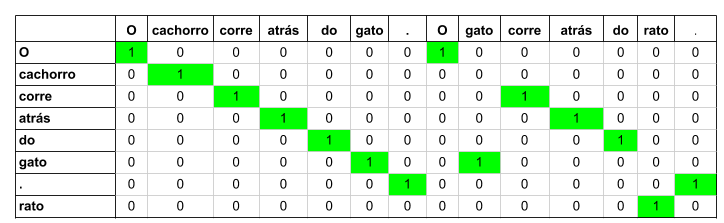

### Outra técnica utilizada e considerada mais eficaz nesse processo é o **mapa de vetores multidimensional**, onde cada palavra é representada por coordenadas de forma matemática (números) e visa representar cada palavra ou sentença. Dessa forma conseguimos calcular a distância de cada vetor e analisar a proximidade linguística de cada palavra ou sentença e associar a um determinado contexto como exemplo. Veja abaixo um exemplo simbólico da representação desse vetor:

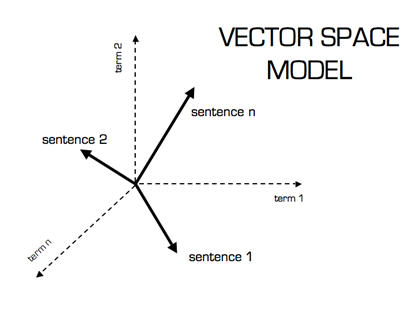

<br/>

## **Word Embeddings**

## Word Embedding é conjunto de modelos para mineração de textos, ou seja, é mais uma técnica de pré-processamento em NLP, onde os textos são transformados e **as palavras representadas por um vetor na forma numérica**, ou seja, em uma representação matemática de cada palavra.
<br/>

## Até aqui vimos implementações usando modelos com **bag of words**, onde as palavras são representadas em vetores grandes e esparsos que podem representar todo o corpus ou documento, as implementações com modelos de **word embeddings** utilizam representações de **vetores densos de tamanho fixo** que são capazes de armazenar informações sobre o contexto e significado dos documentos.
<br/>

## Depois de definido a técnica e o vetor na abordagem com word embedding, cada palavra é representada por um ponto em um espaço multidimensional (**embedding space**) e como falamos, cada palavra é representada de forma numérica no vetor, que na verdade são os pontos/dimensões de cada palavra.
<br/>


![alt text](https://d17h27t6h515a5.cloudfront.net/topher/2017/March/58c0aaf4_linear-relationships/linear-relationships.png)

<br/>

### Exemplo de visualização de um Embedding: https://projector.tensorflow.org/
<br/>

## Existem dois modelos mais conhecidos de aplicação Word Embeddings, são eles:

- 
### **Word2Vec**, que foi desenvolvido por Tomas Mikolov e pode utilizar algoritmos diferentes e são baseados em redes neurais, são eles:
  - 
###  **Continuous Bag-of-Words (CBOW)**: A ideia do algoritmo Continuous bag of words é prever qual a palavra que estamos buscando a partir de um determinado contexto. Para isto a entrada da rede é um vetor one-hot encoded que represente as palavras do contexto e a sua saída é a palavra que estamos buscando.
  -
###  **Skip-Gram**: A abordagem do Skip-gram é a inversa, tomando como ponto de partida uma determinada palavra, o objetivo é prever o contexto do qual esta palavra veio. Para isto a entrada da rede é um vetor one-hot encoded que represente a palavra que estamos buscando e a sua saída, as palavras do contexto.

![alt text](https://skymind.ai/images/wiki/word2vec_diagrams.png)

- 
###  **GloVe (Global Vectors for Word Representation)**, desenvolvido por Pennington em Stanford. É uma extensão do método Word2Vec, no entanto, ao invés de usar uma janela fixa para configurar o contexto, este método constrói a matriz co-occurrence usando estatísticas extraídas do próprio texto.

<br/>


<br/>

---
<br/>

### Sendo mais especifico, Word Embeddings é um modelo de rede neural para representar dados com um grande número de classes de forma mais eficiente. Os Embeddings melhoram muito a capacidade das redes neurais de aprender com dados desse tipo, representando os dados com vetores de menor dimensão.

### Word Embeddings em particular são interessantes porque as redes são capazes de aprender relações semânticas entre as palavras. Por exemplo, os embeddings saberão que o equivalente masculino de uma rainha é um rei.

<br/>



<br/>

---

<font size=5>
O Word Embeddings que iremos conhecer é chamado Word2Vec pois ele cria um vetor de tamanho fixo para cada palavra!
<br/><br/>
Nosso foco não será a implementação do Word2Vec mas sim como ele funciona e sua capacidade de extrair significado das palavras, o que se torna útil para a análise semântica! Os motivos para isso são:
<br/><br/>

1.   Nossa agenda e a limitação de tempo!<br/>
2.   A possibilidade de reaproveitar uma rede treinada (transfer learning), como se faz com CNN como (VGG, RestNet, Inception etc)

<br/>

### Para quem se interessar em saber mais sobre Word Embeddings, abaixo estão boas referências!

  
1.   [Uma visão geral conceitual muito boa do word2vec de Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)<br/>
2.   [Primeiro artigo sobre word2vec de Mikolov et al](https://arxiv.org/pdf/1301.3781.pdf)<br/>
3.   [Video de ilustração e implementação em Tensorflow](https://www.youtube.com/watch?v=64qSgA66P-8)<br/>
4.  [Modelos de Word Embeddings treinados em pt-br](http://nilc.icmc.usp.br/embeddings)


</font>

# Como o Word2Vec funciona?

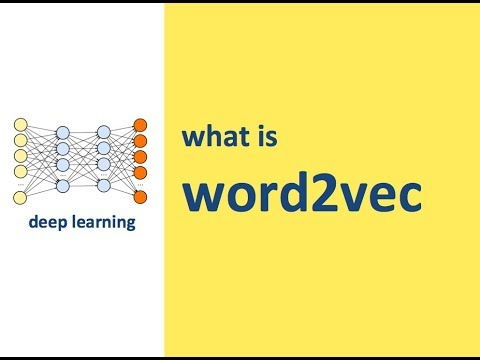

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("64qSgA66P-8")

<br/><br/>

## **Word2Vec com Spacy**
---

<font size=5>
Vamos baixar o modelo em inglês do SpaCy, pois apenas nele temos o Word2Vec criado. Infelizmente o modelo em português disponível não inclui o Word2Vec.
<br/><br/>
Vamos trabalhar com um modelo em português a frente.
</font>

In [2]:
!python -m spacy download en_core_web_lg

ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



<font size=5>
A forma mais simples de explorar a similaridade de palavras atravez do Word2Vec é usando o método `.similarity`.
</font>


In [1]:
import spacy
#import en_core_web_lg
#en = en_core_web_lg.load()
en = spacy.load('en_core_web_lg')

tokens = en(u'banana cat dog')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

banana banana 1.0
banana cat 0.28154364
banana dog 0.24327643
cat banana 0.28154364
cat cat 1.0
cat dog 0.80168545
dog banana 0.24327643
dog cat 0.80168545
dog dog 1.0


In [ ]:
'''
import spacy
import pt_core_news_sm

pt = pt_core_news_sm.load()

tokens = pt(u'banana cachorro gato')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))
'''

<br/>

Outro exemplo de similaridade:

In [ ]:
def most_similar(word):
  query = [w for w in word.vocab if w.is_lower == word.is_lower and w.prob >= -15]
  by_similarity = sorted(query, key=lambda w: word.similarity(w), reverse=True)
  return by_similarity[:10]

[w.lower_ for w in most_similar(en.vocab[u'dog'])]

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Lexeme.similarity based on

['dog',
 'dogs',
 'puppy',
 'pet',
 'cat',
 'puppies',
 'canine',
 'pup',
 'cats',
 'terrier']

<br/>

---
<br/>

# Acredito que estão se perguntando, onde vamos usar isso e como, certo?
<br/>

### Você pode usar este modelo em inúmeras aplicações, por exemplo, pesquisa de produtos ou serviços por meio de suas descrições ou até mesmo em aplicações mais complexas de análise de sentimentos e classificação de documentos.
<br/>

---
<br/>


<font size=5>
Dado que cada palavra tem seu vetor de representação que leva em consideração o contexto em que a mesma esta inserida, é possível calcular o cosseno de similaridade!
</font>

![alt text](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

In [ ]:
'''
king = en.vocab['king'].vector
man = en.vocab['man'].vector
woman = en.vocab['woman'].vector

new_vector = (king - man) + woman

new_vector
'''

In [3]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = en.vocab['king'].vector
man = en.vocab['man'].vector
woman = en.vocab['woman'].vector

#new_vector = king
#new_vector = man
#new_vector = woman
new_vector = (king - man) + woman

computed_similarities = []

for word in en.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word.text, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

computed_similarities[:10]

[('king', 0.8024259805679321),
 ('queen', 0.7880843877792358),
 ('prince', 0.6401076912879944),
 ('kings', 0.6208544373512268),
 ('princess', 0.6125636100769043),
 ('royal', 0.5800970792770386),
 ('throne', 0.5787012577056885),
 ('queens', 0.5743793845176697),
 ('monarch', 0.563362181186676),
 ('kingdom', 0.5520980954170227)]

# **Word2Vec com Gensim**

<br/><br/>
<font size=5>
Gensim é mais uma das libs disponíveis em Python para tarefas de NLP! Ao contrários das outras opções, essa é uma ferramenta mais especializada em tarefas de modelagem de tópicos e análise de similaridade!
<br/><br/>
Sua instalação é muito simples!
<br/><br/>

```
$ pip install gensim==2.0.0
```
</font>
<br/>


In [6]:
# pacote de dependência do gensim
!pip install scipy==1.2.0
!pip install gensim==2.0.0

#Obs: pode ser necessário reiniciar o Runtime do colab

ERROR: Invalid requirement: '#'


  Created wheel for gensim: filename=gensim-2.0.0-cp37-cp37m-win_amd64.whl size=5392280 sha256=9be50ab12c479e9f182f7096a5bd8493c1459585e2ab327fae24bddbf00567f4
  Stored in directory: c:\users\brjuven1\appdata\local\pip\cache\wheels\84\7a\48\3b8208d10ed82358a1555b2494a36ece03d3b6b6d945d8665f
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=d657850564c8fdc1caa595e558ec7c48efc89b6daf6d9647163fc6a9433bbf58
  Stored in directory: c:\users\brjuven1\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built gensim smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


<br/>
<font size=5>
O código abaixo vai baixar o modelo treinado Word2Vec com 300 posições em português e descompactar o mesmo no GDrive! Este arquivo, zipado, tem mais de 800 mega!
</font>

<br/>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import zipfile

url = 'http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s300.zip'
#url = 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip'

tar_gz_path = '/content/gdrive/My Drive/FIAP/NLP/cbow_s300.zip'

class DLProgress(tqdm):
  last_block = 0

  def hook(self, block_num=1, block_size=1, total_size=None):
    self.total = total_size
    self.update((block_num - self.last_block) * block_size)
    self.last_block = block_num

if not isfile(tar_gz_path):
  with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Word2Vec Model') as pbar:
    urlretrieve(
        url,
        tar_gz_path,
        pbar.hook)

if not isfile('/content/gdrive/My Drive/FIAP/NLP/cbow_s300.txt'):     
  zip_ref = zipfile.ZipFile(tar_gz_path, 'r')
  zip_ref.extractall('/content/gdrive/My Drive/FIAP/NLP/')
  zip_ref.close()

Word2Vec Model: 929MB [01:24, 11.0MB/s]                           


<font size=5>
Com o modelo disponível, podemos carrega-lo com a ajuda da classe `KeyedVectors` do Gensim e com esse modelo podemos fazer operações de análise semântica em português!
</font>

In [3]:
!ls /content/gdrive/My\ Drive/FIAP/NLP/cbow_s300.txt

'/content/gdrive/My Drive/FIAP/NLP/cbow_s300.txt'


In [4]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/FIAP/NLP/cbow_s300.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
model.most_similar_cosmul(positive=['cachorro'])

[('cão', 0.8745833039283752),
 ('cachorrinho', 0.8369466662406921),
 ('gambá', 0.8245760798454285),
 ('cãozinho', 0.8212026357650757),
 ('cã£o', 0.8206903338432312),
 ('muffin', 0.8199432492256165),
 ('pônei', 0.8185598254203796),
 ('bichinho', 0.8165299892425537),
 ('filhote', 0.8154804110527039),
 ('garoto', 0.8136572241783142)]

In [8]:
model.most_similar_cosmul(positive=['rei'])

[('monarca', 0.8525514006614685),
 ('imperador', 0.8470561504364014),
 ('príncipe-herdeiro', 0.8317481875419617),
 ('ex-rei', 0.8250481486320496),
 ('príncipe', 0.8220226168632507),
 ('príncipe-regente', 0.8072745203971863),
 ('faraó', 0.8057710528373718),
 ('sacro-imperador', 0.8054810166358948),
 ('cardeal-rei', 0.8019851446151733),
 ('duque', 0.8011462688446045)]

In [9]:
model.most_similar_cosmul(positive=['rei', 'mulher'])

[('amante', 0.521075427532196),
 ('sobrinha', 0.5057626962661743),
 ('esposa', 0.5052025318145752),
 ('filha', 0.5002935528755188),
 ('neta', 0.4912657141685486),
 ('rainha', 0.49124616384506226),
 ('mãe', 0.48989352583885193),
 ('viúva', 0.48714423179626465),
 ('meia-irmã', 0.48353707790374756),
 ('noiva', 0.48313799500465393)]

In [10]:
# calculo: (king - man) + woman = ?
model.most_similar_cosmul(positive=['rei', 'mulher'], negative=['homem'])

[('meia-irmã', 0.9702042937278748),
 ('esposa', 0.9664881229400635),
 ('rainha', 0.9587218165397644),
 ('princesa', 0.9533654451370239),
 ('sobrinha', 0.9444013833999634),
 ('filha', 0.925252377986908),
 ('irmã', 0.9192135334014893),
 ('neta', 0.9184019565582275),
 ('rainha-consorte', 0.9000979661941528),
 ('dama-de-companhia', 0.8932625651359558)]

In [ ]:
'''
descrição da função most_similar_cosmul()

most_similar_cosmul(positive, negative, topn)

model.most_similar_cosmul(positive=None, negative=None, topn=10)
Find the top-N most similar words, using the multiplicative combination objective, proposed by Omer Levy and Yoav Goldberg "Linguistic Regularities in Sparse and Explicit Word Representations" <http://www.aclweb.org/anthology/W14-1618>_. Positive words still contribute positively towards the similarity, negative words negatively, but with less susceptibility to one large distance dominating the calculation. In the common analogy-solving case, of two positive and one negative examples, this method is equivalent to the "3CosMul" objective (equation (4)) of Levy and Goldberg.

Additional positive or negative examples contribute to the numerator or denominator, respectively - a potentially sensible but untested extension of the method. With a single positive example, rankings will be the same as in the default :meth:~gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar.

Parameters
positive : list of str, optional

    List of words that contribute positively.  
negative : list of str, optional

    List of words that contribute negatively.  
topn : int, optional

    Number of top-N similar words to return.  
Returns
list of (str, float)

    Sequence of (word, similarity).
'''

In [11]:
model.doesnt_match("cachorro gato passarinho almoço".split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:546: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'almoço'

In [12]:
model.wmdistance(
    'Barack Obama falou na ONU', 
    'Batatinha quando nasce' )

2.0862423665753016

In [13]:
model.wmdistance('falou', 'taguarelou')

1.4045971977272034

In [14]:
model.wmdistance('Batatinha quando nasce', 'Pirulito que bate bate')

2.035354679146827

In [15]:
model.wmdistance('Batatinha quando nasce', 'Batatinha se esparrama')

1.6145833186333007

##**Exercício 2**

1.   Crie uma função que substitua uma ou mais palavras de um texto um uma palavra similar com base na sua classe gramatical.
2.   Extenda essa função para considerar uma substituição positiva ou negativa.

### Dicas:
- Crie uma função que receba como parâmetro: a frase, a classe gramatical e o sentido (palavra no mesmo sentido ou sentido contrário - negativo)
- Use o Spacy para localizar a marcação POS Tag
- Use o modelo Word2Vec que treinanmos para localizar a similaridade


<br/><br/><br/><br/><br/><br/>

## **Criando nosso próprio modelo de similaridade**

---

In [16]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

#import gensim.downloader as api

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
# Cria os dados de treino. Exemplo simples para fins didático.
lista = [         
    [1, 'Este servico e oferecido em Sao Paulo'], 
    [2, 'Este servico e oferecido no Rio de Janeiro'],
    [3, 'Este servico e oferecido em Tocantins'],
    [4, 'Este servico e oferecido na Bahia']]

df = pd.DataFrame(data = lista, columns = ['id', 'descicao'])
df.head()

,id,descicao
0,1,Este servico e oferecido em Sao Paulo
1,2,Este servico e oferecido no Rio de Janeiro
2,3,Este servico e oferecido em Tocantins
3,4,Este servico e oferecido na Bahia


In [ ]:
# Transforma a descrição em tokens
df['tokens'] = df.descicao.apply(word_tokenize)

# Cria um dicionario com os tokens do dataframe
dct = Dictionary(df['tokens'])

# Converte corpus para o formato BOW (Bag Of Words)
corpus = [dct.doc2bow(line) for line in df['tokens']]

# Cria um modelo TF-IDF usando o gensim
model = TfidfModel(corpus)

Analisando cada objeto criado

In [22]:
# Sentença em tokens
df['tokens']

0        [Este, servico, e, oferecido, em, Sao, Paulo]
1    [Este, servico, e, oferecido, no, Rio, de, Jan...
2         [Este, servico, e, oferecido, em, Tocantins]
3             [Este, servico, e, oferecido, na, Bahia]
Name: tokens, dtype: object

In [23]:
# Cada plavra com sua identificação (id)
dct.token2id

{'Bahia': 13,
 'Este': 0,
 'Janeiro': 10,
 'Paulo': 6,
 'Rio': 8,
 'Sao': 5,
 'Tocantins': 11,
 'de': 9,
 'e': 2,
 'em': 4,
 'na': 12,
 'no': 7,
 'oferecido': 3,
 'servico': 1}

In [24]:
# Contagem de termos simples
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (11, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (12, 1), (13, 1)]]

In [ ]:
# Deswcrição: Este servico e oferecido em Sao Paulo
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [25]:
# TF-IDF da deswcrição "Este servico e oferecido em Sao Paulo"
model[corpus[0]]

[(4, 0.3333333333333333), (5, 0.6666666666666666), (6, 0.6666666666666666)]

In [26]:
# Outro forma de salvar o modelo para reutilizar e produtizar
dct.save('dct')
model.save('model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 Jun  6 10:27 .
drwxr-xr-x 1 root root 4096 Jun  6 09:15 ..
drwxr-xr-x 1 root root 4096 Jun  2 16:14 .config
-rw-r--r-- 1 root root  485 Jun  6 10:27 dct
drwx------ 4 root root 4096 Jun  6 10:08 gdrive
-rw-r--r-- 1 root root  532 Jun  6 10:27 model
drwxr-xr-x 1 root root 4096 May 29 18:19 sample_data


Aplicando as tranformações com a matriz TF-IDF treinada

In [28]:
dct_novo = Dictionary.load('dct')
model_novo = TfidfModel.load('model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Criando um texto de exemplo
novo_texto = 'Este servico e oferecido em Santa Catarina'
#novo_texto = 'Esse texto não tem nada haver'

# Transforma a descricao do servico em tokens de palavras
novo_texto_tokens = word_tokenize(novo_texto)

# Converte corpus para o formato BOW (Bag Of Words)
novo_texto_corpus = dct_novo.doc2bow(novo_texto_tokens)

# Extrai a matrix TF-IDF do novo texto
model_novo[novo_texto_corpus]

[(4, 1.0)]

Criando uma matriz de similaridades

In [33]:
# Cria a matriz de similaridade com base no corpus de entrada
#model_novo[corpus[0]]
#dct_novo.token2id
index = similarities.SparseMatrixSimilarity(model_novo[corpus], num_features=len(dct_novo))

# Salva a matriz
index.save('index')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Simulando 

In [34]:
# Carregando as dependencias dos modelos
dct_novo = Dictionary.load('dct')
model_novo = TfidfModel.load('model')
index_novo = similarities.Similarity.load('index')

# Texto de exemplo
novo_texto = 'Este servico e oferecido em Santa Catarina'
#novo_texto = 'Esse texto não tem nada haver'
#novo_texto = 'Este servico e oferecido em Sao Paulo'

# Transforma a descricao em tokens
novo_texto_tokens = word_tokenize(novo_texto)

# Converte corpus para o formato BOW (Bag Of Words)
novo_texto_corpus = dct_novo.doc2bow(novo_texto_tokens)

# Buscando a similaridade
sim = index_novo[model_novo[novo_texto_corpus]]
sim

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


array([0.33333334, 0.        , 0.4472136 , 0.        ], dtype=float32)

In [35]:
df['sim'] = sim
df.head()

,id,descicao,tokens,sim
0,1,Este servico e oferecido em Sao Paulo,"[Este, servico, e, oferecido, em, Sao, Paulo]",0.333333
1,2,Este servico e oferecido no Rio de Janeiro,"[Este, servico, e, oferecido, no, Rio, de, Jan...",0.000000
2,3,Este servico e oferecido em Tocantins,"[Este, servico, e, oferecido, em, Tocantins]",0.447214
3,4,Este servico e oferecido na Bahia,"[Este, servico, e, oferecido, na, Bahia]",0.000000


### Analisando o resultado:

Veja que a matriz de similaridade compra os resultados com base na similadidades das palavras encontradas no texto de origem

## Outra forma de criar modelos de similaridade

---
Mas agora vamos usar modelos de Word Embedding através de vetores

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Vamos usar nosso dataframe de produtos
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

In [ ]:
# Tokenizando o texto
df['tokens'] = df.texto.apply(word_tokenize)

In [ ]:
# Treinando nosso modelo com o nosso vocabulário
model = Word2Vec(df['tokens'], size=100, min_count=1, sg=0)

# Treina o modelo. Note que estamos setando o parametro sd = 0, ou seja, o algoritmo utilizado sera o CBOW
# Outro ponto de destaque é que quando setamos o parametro min_count para 1 estamos forcando o uso de todas as palavras.

**size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word). <br/>
**window**: (default 5) The maximum distance between a target word and words around the target word.<br/>
**min_count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.<br/>
**workers**: (default 3) The number of threads to use while training.<br/>
**sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).<br/>

Referência: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
# Exibe os parametros do meodelo treinado
print(model)

Word2Vec(vocab=49741, size=100, alpha=0.025)


In [ ]:
# Exibe o vocabulario do modelo treinado
words = list(model.wv.vocab)
print(words)

['O', 'Hobbit', '-', '7ª', 'Ed', '.', '2013', 'Produto', 'NovoBilbo', 'Bolseiro', 'é', 'um', 'hobbit', 'que', 'leva', 'uma', 'vida', 'confortável', 'e', 'sem', 'ambições', 'Mas', 'seu', 'contentamento', 'perturbado', 'quando', 'Gandalf', ',', 'o', 'mago', 'companhia', 'de', 'anões', 'batem', 'à', 'sua', 'porta', 'levam-no', 'para', 'expedição', 'Eles', 'têm', 'plano', 'roubar', 'tesouro', 'guardado', 'por', 'Smaug', 'Magnífico', 'grande', 'perigoso', 'dragão', 'Bilbo', 'reluta', 'muito', 'em', 'participar', 'da', 'aventura', 'mas', 'acaba', 'surpreendendo', 'até', 'a', 'si', 'mesmo', 'com', 'esperteza', 'habilidade', 'como', 'ladrão', '!', 'CaracterísticasAutor', ':', 'Tolkien', 'J.', 'R.', 'R.Peso', '0.44I.S.B.N', '9788578277109Altura', '20.000000Largura', '13.000000Profundidade', '1.000000Número', 'Páginas', '328Idioma', 'PortuguêsAcabamento', 'BrochuraNúmero', 'edição', '7Ano', 'Livro', 'It', 'A', 'Coisa', 'Stephen', 'King', 'NovoDurante', 'as', 'férias', 'escolares', '1958', 'Derry

In [ ]:
# Acesso o vetor da palavra "sentence"
print(model['brinquedo'])

[-0.34891185  0.12056872  0.27588132  0.04071184  0.20758401  0.11634165
  0.03943014 -0.05032145  0.04486269  0.27380762  0.2647606   0.08403801
  0.23248139 -0.14283939  0.0936592   0.14819476 -0.00883417  0.0613339
  0.06597638 -0.04948359 -0.15339173 -0.01698251 -0.00776956  0.00199198
  0.15153296  0.04351088  0.07117612 -0.42485338 -0.26561433 -0.2795586
  0.06845926 -0.00551403 -0.19526307 -0.08104434  0.4404351  -0.13424923
 -0.23749724 -0.13953029 -0.21708073 -0.23576024  0.11323937  0.01571905
  0.12300857  0.0466935  -0.08821247  0.1247604   0.02302453 -0.26448134
  0.31149158  0.11182584 -0.1436307  -0.40341297  0.1727356   0.38798466
 -0.03420576 -0.2581015  -0.01540679  0.05450277  0.12917253 -0.13261546
 -0.0420393  -0.08261374  0.0870431   0.09634529  0.05831605  0.03285074
 -0.04451227 -0.10394523  0.01946903  0.01852487  0.1311226  -0.04330585
 -0.05585074  0.02593574  0.1660806  -0.0933627   0.09121324 -0.24401803
 -0.07579664 -0.17229031  0.08356524  0.19171695  0.0

In [ ]:
# Salva o modelo
model.save('model.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
!ls -la

total 61560
drwxr-xr-x 1 root root     4096 May 16 10:43 .
drwxr-xr-x 1 root root     4096 May 16 09:20 ..
drwxr-xr-x 1 root root     4096 May 13 16:29 .config
-rw-r--r-- 1 root root      485 May 16 15:17 dct
drwx------ 4 root root     4096 May 16 10:15 gdrive
-rw-r--r-- 1 root root      824 May 16 15:20 index
-rw-r--r-- 1 root root      532 May 16 15:17 model
-rw-r--r-- 1 root root 63002764 May 16 15:31 model.bin
drwxr-xr-x 1 root root     4096 May 13 16:29 sample_data


In [ ]:
# Carrega o modelo
model_novo = Word2Vec.load('model.bin')

# Exibe os parametros do meodelo treinado
print(model_novo)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec(vocab=49741, size=100, alpha=0.025)


In [ ]:
# Buscando similaridade de palavras com o nosso vocabulário
model_novo.most_similar(positive=['maquiagem'], topn=1)

[('base', 0.9618836045265198)]

In [ ]:
# Buscando similaridade de palavras com o nosso vocabulário
model_novo.most_similar_cosmul(positive=['romance'])

model_novo.most_similar_cosmul(positive=['romance'], negative=['mistério']) 

[('Games4Dragon', 1.3129512071609497),
 ('COMPRA.Postagem', 1.2752004861831665),
 ('DISTRIBUIDORPOSTAGEM', 1.2749942541122437),
 ('721', 1.260306477546692),
 ('Grego', 1.2566184997558594),
 ('13,5x19BRINDE*Sabemos', 1.2494841814041138),
 ('0,3', 1.248207688331604),
 ('Peças01', 1.2475650310516357),
 ('Incluída', 1.2465217113494873),
 ('22x15x25cmConteúdo', 1.2453373670578003)]

In [ ]:
# Comparando duas palavras
model_novo.wmdistance('maquiagem', 'base')

1.6988737076220115

In [ ]:
# Comparando duas palavras 
model_novo.wmdistance('maquiagem', 'brinquedo')

2.8689573790428526

<br/>
<br/>

#### **Visualizando nosso vetor**

['O', 'Hobbit']


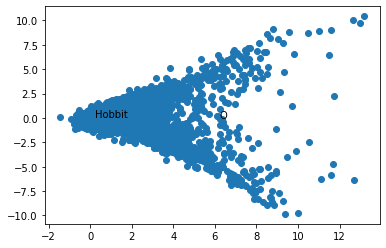

In [ ]:
# Nesta etapa vamos usar PCA (Principal Component Analysis) para visualizar o modelo embedding que criamos.
# Selecionares os dois principais componentes da PCA e os mosraremos em um scatter plot.

from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model_novo[model_novo.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# criando o scatter plot (Gráfico de dispersão)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_novo.wv.vocab)

# selecionamos apenas duas palavras para aparecer na visualização
words = words[:2]
print(words)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

[Mais sobre PCA](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais)

Mais modelos implementações em Word2vec

Modelo treinado para saúde: https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/word-embeddings-para-saude/
<br/>
Mdelos genéricos trenados: http://www.nilc.icmc.usp.br/embeddings